## Predict Restaurant Ratings

### Including Python Libraries 

In [13]:
import pandas as pd #Used for inporting CSV Files 
import matplotlib.pyplot as plt  #for visulaizing results{graph}
import numpy as np  #Sklearn uses numpy array for regressions because it is faster than normal arrays in python
#Sklearn Library for Constructing machine Learning model( multiple  Linear Regression)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Loading dataset 

In [2]:
df = pd.read_csv("zomato_restaurants_in_India.csv")
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [3]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

### Selecting Features and Handling Missing Values

In [4]:
# Selecting relevant features and target variable
X = df[['average_cost_for_two', 'price_range', 'cuisines', 'timings', 'highlights']].copy()
y = df['aggregate_rating'].astype(float)

# Handling missing values for numeric columns
X.loc[:, ['average_cost_for_two', 'price_range']] = X[['average_cost_for_two', 'price_range']].fillna(X[['average_cost_for_two', 'price_range']].mean())

# Handling missing values for categorical columns
X.loc[:, ['cuisines', 'timings', 'highlights']] = X[['cuisines', 'timings', 'highlights']].fillna('missing')

# Handling missing values for target variable
y.fillna(y.mean(), inplace=True)


### Splitting the Data set into Training and testing sets

In [5]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Printing the X and Y Training and Testing sets

In [6]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (169555, 5)
X_test shape: (42389, 5)
y_train shape: (169555,)
y_test shape: (42389,)


### Creating a Processing Pipeline

In [7]:
numeric_features = ['average_cost_for_two', 'price_range']
categorical_features = ['cuisines', 'timings', 'highlights']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Defining and Creating a Model

In [8]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['average_cost_for_two',
                                                   'price_range']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cuisines', 'timings',
                                                   'highlights'])])),
                ('regressor', LinearRegression())])

### Making Predictions and Evaluating the Model

In [15]:
# Making predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model performance using MSE & R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the MSE & R2
print("The Mean Squared Error is : ", mse)
print("The R2 Score of the model is : ", r2)


# Extracting the coefficients
onehot_feature_names = model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)
feature_names = numeric_features + list(onehot_feature_names)

coefficients = pd.Series(model.named_steps['regressor'].coef_, index=feature_names)

# Sorting and printing coefficients by absolute value to see the most impactful features
sorted_coefficients = coefficients.abs().sort_values(ascending=False)
print("Sorted Coefficients by impact:")
print(sorted_coefficients)

NameError: name 'x_test' is not defined

In [10]:
result = model.predict(pd.DataFrame([[1500, 2, 'Punjabi, South Indian', '11 AM - 6 AM', 'Air Conditioned, Wifi, Valet Parking Available, Private Dining Area Available']], columns=['average_cost_for_two', 'price_range', 'cuisines', 'timings', 'highlights']))
print("The predicted Rating is : ",result)

The predicted Rating is :  [3.98435056]


### Plotting Scatter plot to visualize the relationship of featrues with Aggregate Rating witt the trend line of prediction 

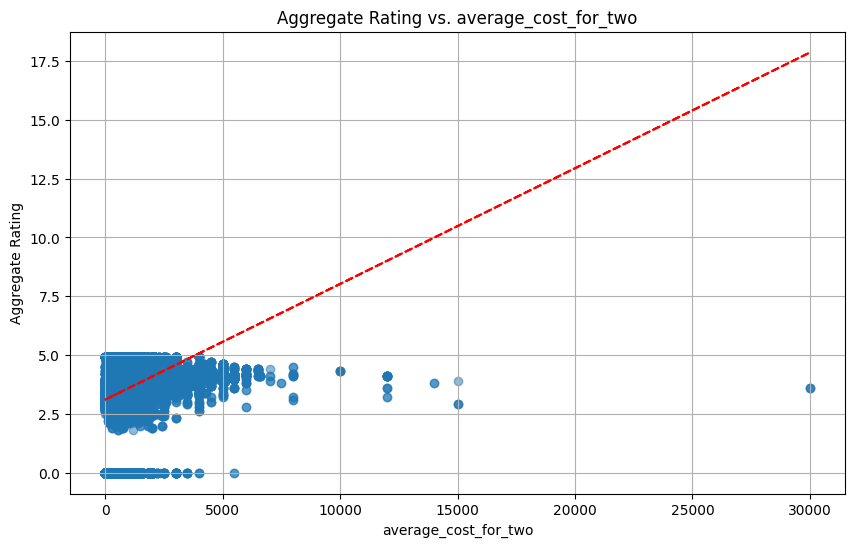

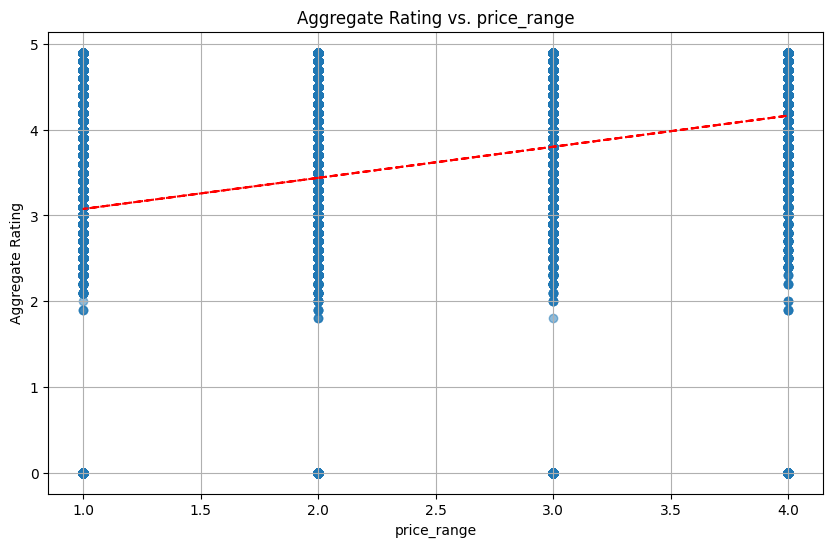

In [11]:
# List of features to plot against aggregate_rating
features_to_plot = ['average_cost_for_two', 'price_range']

# Loop through the features and create scatter plots with trendlines
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df['aggregate_rating'], alpha=0.5)
    plt.title(f'Aggregate Rating vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Aggregate Rating')
    plt.grid(True)

    # Calculate the trendline
    z = np.polyfit(df[feature], df['aggregate_rating'], 1)
    p = np.poly1d(z)
    plt.plot(df[feature], p(df[feature]), "r--")

    plt.show()

In [12]:
import pickle
pickle.dump(model,open('ratings.pkl','wb'))